In [2]:
import numpy as np
from matplotlib import pyplot  as plt
from numpy.random import normal
from scipy.stats import norm

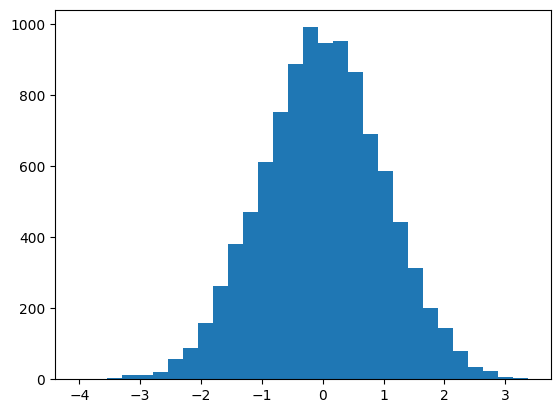

In [8]:
sample = normal(size=10000) #generados aleatoriamente
plt.hist(sample, bins = 30)
plt.show()

## Estimación paramétrica

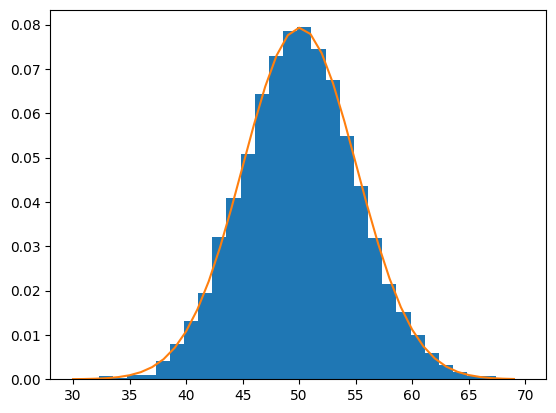

In [4]:
sample = normal(loc=50, scale=5, size=10000) #mu=50, sigma=5
# plt.hist(sample,bins=50)
mu = sample.mean()
sigma = sample.std()
dist = norm(mu,sigma)
values = [value for value in range(30,70)]
probabilidades = [dist.
pdf(value) for value in  values]
plt.hist(sample, bins=30, density=True)
plt.plot(values, probabilidades)
plt.show()

# Estimación no paramétrica

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

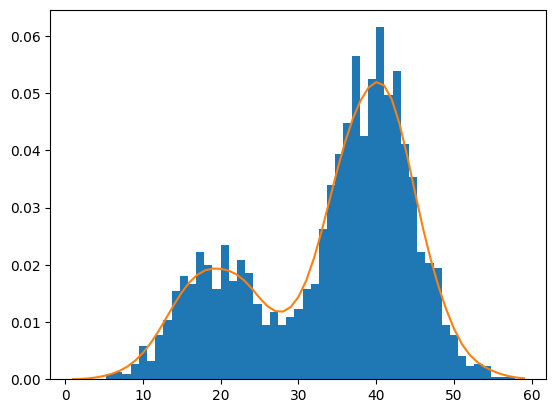

In [23]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=600)
sample2 = normal(loc=40, scale=5, size=1500)
sample = hstack((sample1, sample2))

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad

plt.hist(sample, bins=50, density=True) 
plt.plot(values[:], probabilities)
plt.show()